In [13]:
library(heatmaply)
library(ggplot2)
library(tidyverse)
library(plotly)
library(viridis)
library(viridisLite)
library(readxl)
library(ggpubr)
library(dplyr)
library(Cairo)
library(hrbrthemes)
library(rlist)
library(orca)
library(gridExtra)
library(ggtree)
library(magrittr)
library(tidyr)
library(d3heatmap)
# library(aplot)

In [2]:
fulldata <- read_excel("fulldataset.xls", sheet =  "periphery")
head(fulldata)

number_goat,Group,Treatment,replicate,tissule,C3,C4,C4BP,C1s,C1r,⋯,Factor H,IgA,IgG,IgM,IL-1α,IL-1β,IL-6,IL-10,IFN-γ,TNF-α
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01,A,control,0,peripheral system,31.95920,10.010727,324.3888,195.3220,223.7171,⋯,44.54619,102.7182,5.748832,864.9662,70.38344,91.42569,95.58532,34.23601,214.1123,105.2642
A01,A,control,1,peripheral system,30.46705,9.933771,329.1254,178.7352,248.9767,⋯,41.14568,105.9062,6.147199,879.2681,70.61400,89.90871,94.75070,37.79595,221.9766,106.1898
A01,A,control,2,peripheral system,30.72788,9.423933,313.5998,209.0890,246.0780,⋯,42.45357,108.9010,5.700313,758.7237,72.88669,89.54752,99.14345,36.02664,198.3836,112.2330
A02,A,control,0,peripheral system,NA,NA,NA,NA,NA,⋯,NA,116.3396,5.401538,1099.2445,74.73119,100.13030,105.29331,29.37573,185.7530,105.4820
A02,A,control,1,peripheral system,NA,NA,NA,NA,NA,⋯,NA,116.8227,5.873960,1011.3901,77.72850,101.97236,108.19253,32.53065,162.6365,102.8143
A02,A,control,2,peripheral system,NA,NA,NA,NA,NA,⋯,NA,109.5772,5.730957,998.4504,73.90775,95.00144,103.40443,32.18958,195.2855,103.6854


In [8]:
dataset <- fulldata[, 6:21]
head(dataset)

C3,C4,C4BP,C1s,C1r,C1q,Factor H,IgA,IgG,IgM,IL-1α,IL-1β,IL-6,IL-10,IFN-γ,TNF-α
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31.95920,10.010727,324.3888,195.3220,223.7171,414.1071,44.54619,102.7182,5.748832,864.9662,70.38344,91.42569,95.58532,34.23601,214.1123,105.2642
30.46705,9.933771,329.1254,178.7352,248.9767,426.6574,41.14568,105.9062,6.147199,879.2681,70.61400,89.90871,94.75070,37.79595,221.9766,106.1898
30.72788,9.423933,313.5998,209.0890,246.0780,400.0356,42.45357,108.9010,5.700313,758.7237,72.88669,89.54752,99.14345,36.02664,198.3836,112.2330
NA,NA,NA,NA,NA,NA,NA,116.3396,5.401538,1099.2445,74.73119,100.13030,105.29331,29.37573,185.7530,105.4820
NA,NA,NA,NA,NA,NA,NA,116.8227,5.873960,1011.3901,77.72850,101.97236,108.19253,32.53065,162.6365,102.8143
NA,NA,NA,NA,NA,NA,NA,109.5772,5.730957,998.4504,73.90775,95.00144,103.40443,32.18958,195.2855,103.6854


In [27]:
cor_data <- round(cor(dataset, use = "complete.obs", method = "pearson"), 3) # compared to kendall and spearman, the correlation values of pearson is higher than others

In [39]:
svg("cor_map2.svg", height= 8, width= 8)
heatmap(as.matrix(cor_data))
dev.off()

png 
  2

In [38]:
library(corrplot)
svg("cor_map.svg", height= 8, width= 8)
corrplot(cor(cor_data),
        method ="number",
        type = "upper")
# ggpairs(cor_data)
# ggsave("cor_map2.svg", width = 8, height = 8, units = "cm")
dev.off()

png 
  2

svg 
  3

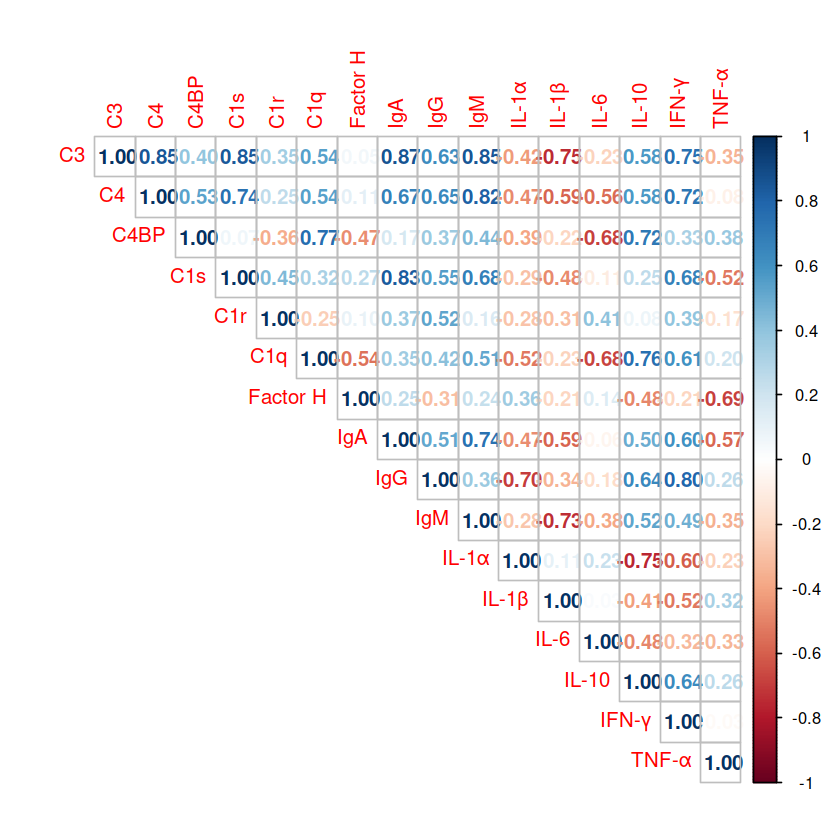

In [36]:
createCorrelationPlots <- function(path, filename, df) {
  corrPlot <- ggpairs(
    df, diag=list(continuous="density"), axisLabels='show')
  png(file.path(path, filename), height=1000, width=1000)
  print(corrPlot)
  dev.off()
}

In [70]:
library(ComplexHeatmap)
library(circlize)

In [71]:
res_list <- readRDS("meth.rds")
summary(res_list)

              Length Class  Mode     
type             20  -none- character
mat_meth      20000  -none- numeric  
mat_expr      20000  -none- numeric  
direction      1000  -none- character
cor_pvalue     1000  -none- numeric  
gene_type      1000  -none- character
anno_gene      1000  -none- character
dist           1000  -none- numeric  
anno_enhancer  3000  -none- numeric  

In [94]:
type <- res_list$type
mat_meth <- res_list$mat_meth
mat_expr <- res_list$mat_expr
direction <- res_list$direction
cor_pvalue <- res_list$cor_pvalue
gene_type <- res_list$gene_type
anno_gene <- res_list$anno_gene
dist <- res_list$dis
anno_enhancer <- res_list$anno_enhancer
##首先计算甲基化矩阵的列聚类，以便可以将表达矩阵中的列调整为具有与甲基化矩阵中相同的列顺序。
column_tree <- hclust(dist(t(mat_meth)))
column_order <- column_tree$order

In [80]:
library(RColorBrewer)

In [81]:
#定义甲基化表达水平颜色，从0/blue-0.5/white-1/red渐变
meth_col_fun = colorRamp2(c(0, 0.5, 1), c("blue", "white", "red"))
# definition the direction of color
direction_col <- c("hyper" = "red", "hypo"= "blue")
# definition gene expression level
expr_col_fun <- colorRamp2(c(-2, 0, 2), c("green", "white", "red"))

In [82]:
# definition p value of correlation
pvalue_col_fun <- colorRamp2(c(0,2,4), c("white", "white", "red"))

In [83]:
#定义基因类型颜色
gene_type_col = structure(brewer.pal(length(unique(gene_type)), "Set3"), 
                          names = unique(gene_type))

In [84]:
#定义注释model颜色
anno_gene_col = structure(brewer.pal(length(unique(anno_gene)), "Set1"), 
                          names = unique(anno_gene))

In [85]:
#定义距离颜色
dist_col_fun = colorRamp2(c(0, 10000), c("black", "white"))

In [86]:
#定义增强子相关颜色
enhancer_col_fun = colorRamp2(c(0, 1), c("white", "orange"))

In [87]:
##我们首先定义两个列注释，然后制作复杂的热图。
#ht_global_opt()是一个可选函数，它会全局控制一些参数。我们可以通过此全局函数同时为所有热图/注释设置一些参数。需要注意的是，一定将它放在热图代码(也就是Heatmap())之前，并在绘制热图后重置所有选项值以消除对下一个热图的影响。
#可以通过?ComplexHeatmap::ht_global_opt查看此函数的帮助
names(ht_global_opt())        #可查看该函数可定义的参数

[1] "heatmap_row_names_gp"      "heatmap_column_names_gp"  
 [3] "heatmap_row_title_gp"      "heatmap_column_title_gp"  
 [5] "legend_title_gp"           "legend_title_position"    
 [7] "legend_labels_gp"          "legend_grid_height"       
 [9] "legend_grid_width"         "legend_border"            
[11] "legend_gap"                "heatmap_border"           
[13] "annotation_border"         "fast_hclust"              
[15] "show_parent_dend_line"     "verbose"                  
[17] "message"                   "show_vp"                  
[19] "simple_anno_size"          "DENDROGRAM_PADDING"       
[21] "DIMNAME_PADDING"           "TITLE_PADDING"            
[23] "COLUMN_ANNO_PADDING"       "ROW_ANNO_PADDING"         
[25] "HEATMAP_LEGEND_PADDING"    "ANNOTATION_LEGEND_PADDING"
[27] "save_last"                 "heatmap_legend_title_gp"  
[29] "heatmap_legend_labels_gp"

In [88]:
ht_global_opt(
  heatmap_legend_title_gp = gpar(fontsize = 8, fontface = "bold"), 
  heatmap_legend_labels_gp = gpar(fontsize = 8), 
  heatmap_column_names_gp = gpar(fontsize = 8),
  heatmap_column_title_gp = gpar(fontsize = 10),
  heatmap_row_title_gp = gpar(fontsize = 8),ADD=TRUE
)

In [89]:
#利用HeatmapAnnotation()对行或列注释。HeatmapAnnotation()函数会生成一个注释用的list对象。该函数的主要格式是HeatmapAnnotation(df/数据框, name/注释名称, col/注释颜色列表, show_legend/是否显示数据框中每一列的图例)
#样本类型注释，Tumor样本为pink，Control样本为royalbule，名称在左边
ha = HeatmapAnnotation(type = type, 
                       col = list(type = c("Tumor" = "pink", "Control" = "royalblue")),
                       annotation_name_side = "left")

In [90]:
#不显示图例名称
ha2 = HeatmapAnnotation(type = type, 
                        col = list(type = c("Tumor" = "pink", "Control" = "royalblue")), 
                        show_legend = FALSE)

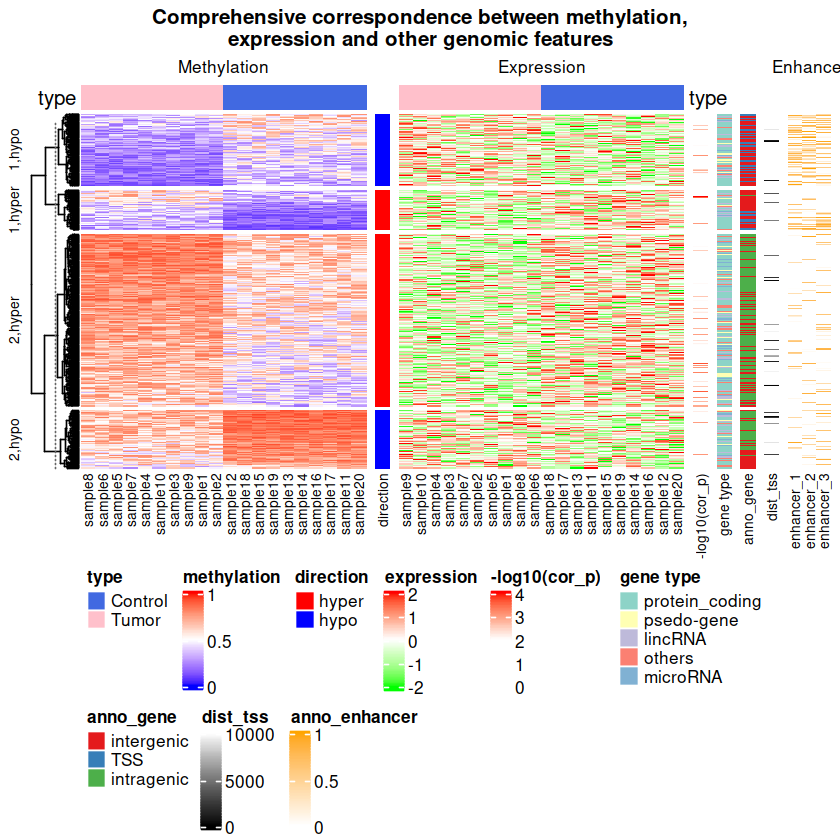

In [91]:
#Heatmap()实际上是单一热图的类构造函数。如果需要组合超过一个热图，用户可以通过+操作符添加热图。默认情况下，将两个热图通过+连接后，第二个热图的行聚类树会去掉，行的顺序会与是第一个热图的顺序保持一致。
ht_list = Heatmap(mat_meth, name = "methylation", col = meth_col_fun,
                  column_order= column_order,
                  top_annotation = ha, column_title = "Methylation") +
  Heatmap(direction, name = "direction", col = direction_col) +
  Heatmap(mat_expr[, column_tree$order], name = "expression", 
          col = expr_col_fun, 
          column_order = column_order, 
          top_annotation = ha2, column_title = "Expression") +
  Heatmap(cor_pvalue, name = "-log10(cor_p)", col = pvalue_col_fun)+ 
  Heatmap(gene_type, name = "gene type", col = gene_type_col) +
  Heatmap(anno_gene, name = "anno_gene", col = anno_gene_col) +
  Heatmap(dist, name = "dist_tss", col = dist_col_fun) +
  Heatmap(anno_enhancer, name = "anno_enhancer", col = enhancer_col_fun, 
          cluster_columns = FALSE, column_title = "Enhancer")
draw(ht_list, km = 2, split = direction,
     column_title = "Comprehensive correspondence between methylation,
expression and other genomic features", 
     column_title_gp = gpar(fontsize = 12, fontface = "bold"), 
     merge_legends = TRUE, heatmap_legend_side = "bottom")

In [92]:
#重置全局参数消除影响  
ht_global_opt(RESET = TRUE)